
Call:
glm(formula = Surive ~ Fare, family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4906  -0.8878  -0.8531   1.3429   1.5942  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.941330   0.095129  -9.895  < 2e-16 ***
Fare         0.015197   0.002232   6.810 9.79e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.7  on 890  degrees of freedom
Residual deviance: 1117.6  on 889  degrees of freedom
AIC: 1121.6

Number of Fisher Scoring iterations: 4


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



Call:
glm(formula = Surive ~ Fare.log, family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5842  -0.9271  -0.8138   1.2263   6.1600  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.01242    0.24186  -8.321  < 2e-16 ***
Fare.log     0.52613    0.07711   6.823 8.91e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.7  on 890  degrees of freedom
Residual deviance: 1122.7  on 889  degrees of freedom
AIC: 1126.7

Number of Fisher Scoring iterations: 5


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


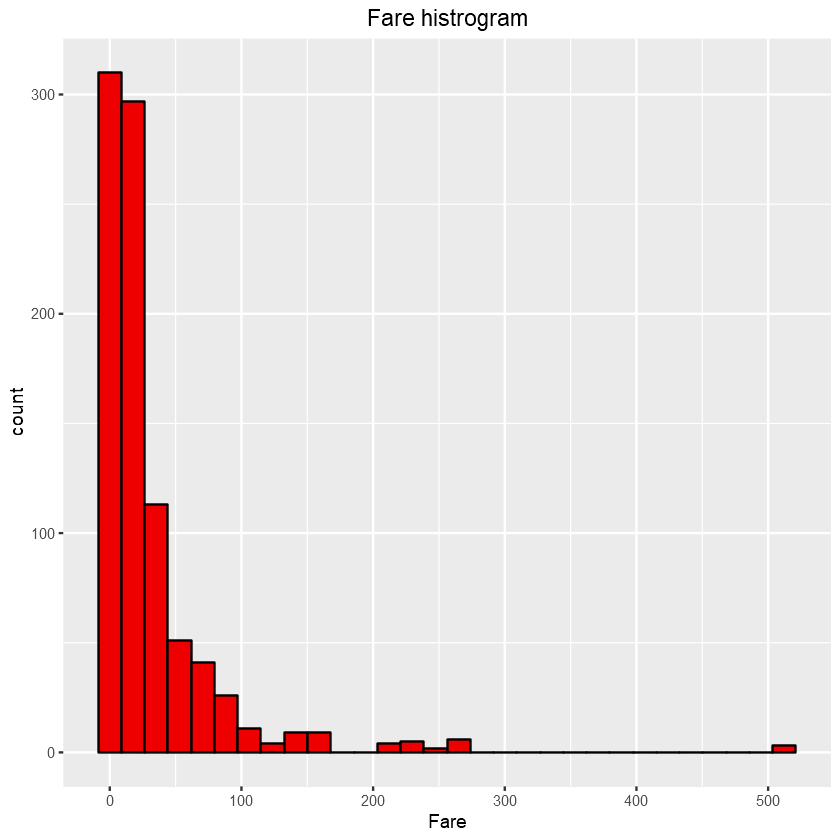


Call:
glm(formula = Surive.re ~ Fare.log.re, family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8380  -0.9035  -0.7417   1.1829   1.7242  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.68274    0.25637  -10.46   <2e-16 ***
Fare.log.re  0.74793    0.08192    9.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1171.1  on 875  degrees of freedom
Residual deviance: 1077.1  on 874  degrees of freedom
AIC: 1081.1

Number of Fisher Scoring iterations: 4


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


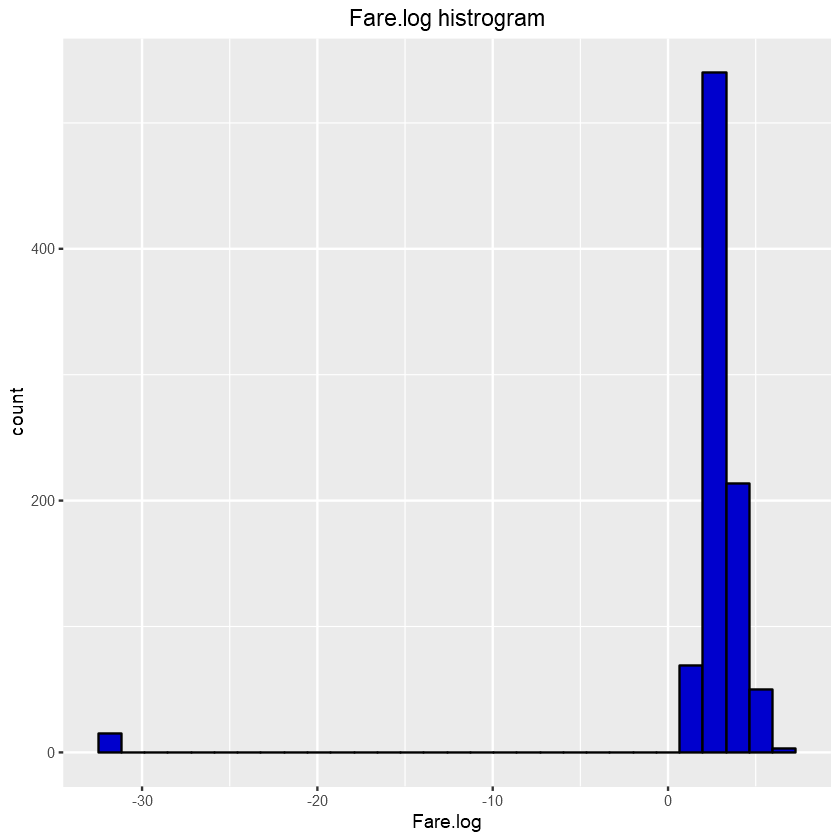

method,AIC
origin,1121.569
log,1126.721
log+remove outlier,1081.113


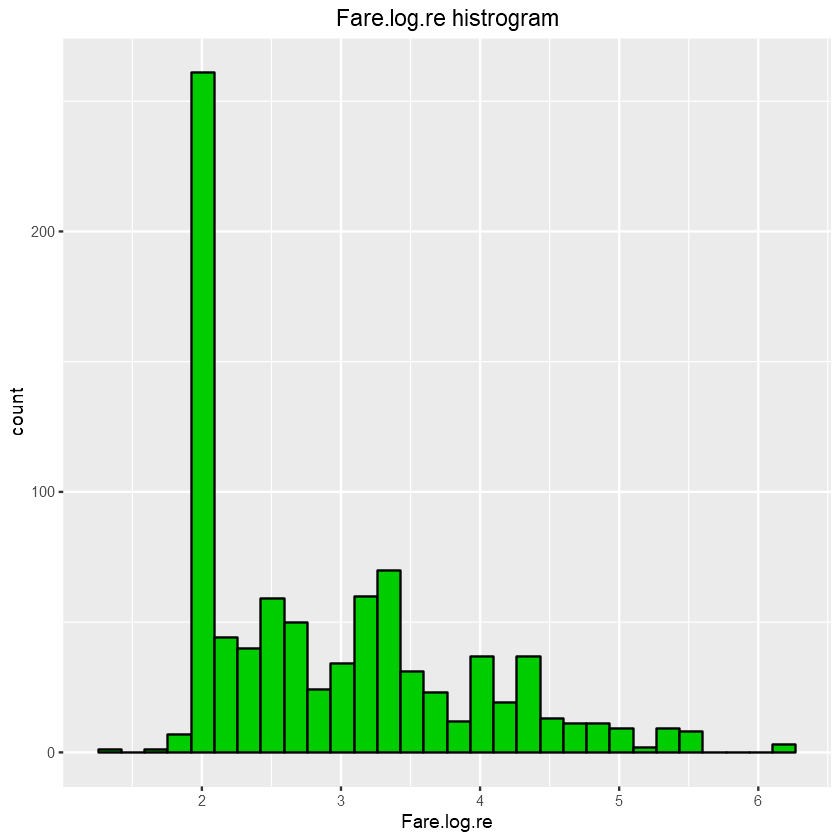

In [1]:
library(ggplot2)
dat=read.csv('C:\\Users\\coco40725\\Documents\\GitHub\\2nd-ML100Days\\data\\titanic_train.csv')

#試著在鐵達尼的票價 (Fare) 欄位中使用對數去偏 (log1p) , 結果是否更好?
Fare=dat$Fare
loc0=which(Fare==0)
Fare[loc0]=10^-14
plot1=ggplot()+geom_histogram(aes(x=Fare),fill='red2',col='black')+ggtitle('Fare histrogram')+
  theme(plot.title = element_text(hjust = 0.5))

Surive=dat$Survived
fit.1=glm(Surive~Fare,family = binomial(link='logit'))
summary(fit.1)
plot1

## log 
Fare.log=log(Fare,exp(1))

plot2=ggplot()+geom_histogram(aes(x=Fare.log),fill='blue3',col='black')+ggtitle('Fare.log histrogram')+
  theme(plot.title = element_text(hjust = 0.5))

fit.2=glm(Surive~Fare.log,family = binomial(link='logit'))
summary(fit.2)
plot2

## remove outlier
Fare.log.re=Fare.log[-loc0]
Surive.re=Surive[-loc0]
fit.3=glm(Surive.re~Fare.log.re,family = binomial(link='logit'))
plot3=ggplot()+geom_histogram(aes(x=Fare.log.re),fill='green3',col='black')+ggtitle('Fare.log.re histrogram')+
  theme(plot.title = element_text(hjust = 0.5))

summary(fit.3)
plot3

aic.re=data.frame(method=c('origin','log','log+remove outlier'),AIC=c(1121.5692,1126.7212,1081.1130))
aic.re

## cox box
library(MASS)
cox.1=boxcox(Surive~Fare)
##>Error in boxcox.default(Surive ~ Fare) : 
##>response variable must be positive

Surive.2=Surive
loc.s0=which(Surive==0)
Surive.2[loc.s0]=2
cox.2=boxcox(Surive.2~Fare)

Surive.3=Surive
loc.s0=which(Surive==0)
Surive.3[loc.s0]=3
cox.3=boxcox(Surive.3~Fare)
## 把0修改成其他正數 ex 2,3